In [1]:
#Importing Keras libraries

In [2]:
import keras

In [3]:
#Importing ImageDataGenerator from Keras

In [4]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#Defining the Parameters

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)

In [8]:
#Applying ImageDataGenerator functionality to train dataset

In [10]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/train_set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 442 images belonging to 2 classes.


In [11]:
#Applying ImageDataGenerator functionality to test dataset

In [12]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/test_set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 121 images belonging to 2 classes.


In [13]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Initializing the model


In [15]:
model = Sequential()

In [16]:
#Adding CNN Layers

In [17]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

In [18]:
#Add Dense layers

In [19]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

In [20]:
#configuring the learning process


In [21]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [22]:
#Training the model

In [23]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 152s 11s/step - loss: 1.2336 - accuracy: 0.6244 - val_loss: 0.3944 - val_accuracy: 0.8760
Epoch 2/10
14/14 [==============================] - 23s 2s/step - loss: 0.3932 - accuracy: 0.8394 - val_loss: 0.1940 - val_accuracy: 0.9421
Epoch 3/10
14/14 [==============================] - 22s 2s/step - loss: 0.2676 - accuracy: 0.8914 - val_loss: 0.1266 - val_accuracy: 0.9835
Epoch 4/10
14/14 [==============================] - 23s 2s/step - loss: 0.2115 - accuracy: 0.9072 - val_loss: 0.0966 - val_accuracy: 0.9587
Epoch 5/10
14/14 [==============================] - 22s 2s/step - loss: 0.1967 - accuracy: 0.9231 - val_loss: 0.0950 - val_accuracy: 0.9752
Epoch 6/10
14/14 [==============================] - 24s 2s/step - loss: 0.1907 - accuracy: 0.9253 - val_loss: 0.1514 - val_accuracy: 0.9256
Epoch 7/10
14/14 [==============================] - 23s 2s/step - loss: 0.2169 - accuracy: 0.9072 - val_loss: 0.0874 - val_accuracy: 0.9669
Epoch 8/10
14/14 [

In [24]:
#Save the model

In [25]:
model.save("/content/drive/MyDrive/forest1.h5")

In [28]:
#Predictions

In [29]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("/content/drive/MyDrive/forest1.h5")
img=image.load_img('/content/drive/MyDrive/test_set/with fire/Forest_fire_MNRF_esize_IMG_6743.jpg')
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [30]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)

1/1 [==============================] - 0s 139ms/step


1

In [31]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 6.5 MB/s 


In [32]:
from twilio.rest import Client

In [33]:

if pred==0:
  print('Forest fire')
  account_sid='AC4c9a105651d0150d1b85af1bd4cf090c'
  auth_token='ee06c7d5053b02ef2ee7689157b255ee'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+15134660214',
      #to number
      to='+919361632961')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==1:
  print('No Fire')

No Fire


In [34]:
#Open cv for video processing

In [35]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
#Creating An Account in Twilio Service
#Sending Alert Message

In [37]:
from logging import WARNING
#import opencv library
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#import playsound package

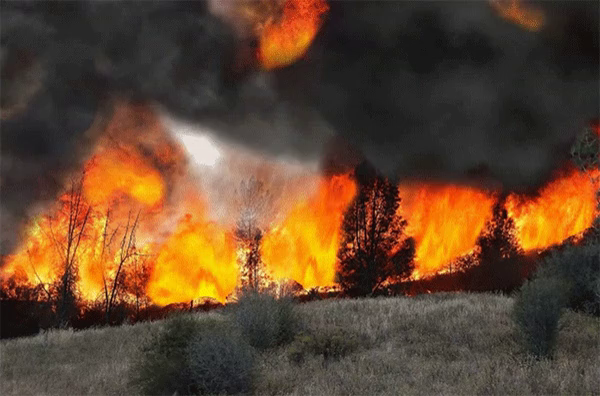

1/1 [==============================] - 0s 70ms/step
Forest fire


In [39]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/FOREST  FIRE (1).mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    
    cv2_imshow(frame)
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/drive/MyDrive/forest1.h5")
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("no danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()


In [40]:
from twilio.rest import Client
if pred==0:
  print('Forest fire')
  from twilio.rest import Client
  account_sid='AC4c9a105651d0150d1b85af1bd4cf090c'
  auth_token='ee06c7d5053b02ef2ee7689157b255ee'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+15134660214',
      #to number
      to='+919361632961')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==1:
  print('No Fire')

Forest fire
SM6c3521055b9c8a7899bfb240b5ea1b51
Fire detected
SMS Sent!
